# 분류(Classification)  

## 1. MNIST  

- MNIST란, 손으로 쓴 숫자들의 이미지를 모아놓은 데이터를 의미한다.  
- 70,000개의 작은 숫자 이미지와 각 이미지가 어떤 숫자를 나타내는지 레이블 되어 있는 데이터로 머신러닝 딥러닝 알고리즘의 학습데이터로 많이 사용되는 유명한 데이터 셋이다.  
- 변수 : 784(28x28픽셀)개
- 변수 값 : 0(흰색) ~ 255(검은색)까지의 픽셀 강도  

In [40]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [11]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [16]:
dir(mnist)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

이 mnist 데이터는 딕셔너리와 비슷한 구조를 가지고 있다.  


- 데이터셋을 설명하는 DESCR 키  
- 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data키  
- 레이블의 배열을 담고 있는 targe키  

In [24]:
X, y = mnist["data"], mnist["target"]

이 데이터를 살펴보면 이미지가 70,000개가 있고, 각 이미지에는 784개의 특성이 있다.  
이는 특성이 784(28x28)개인 이유는 이미지가 28x28 픽셀이기 때문이다. 

In [33]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


데이터 셋에서 이미지 하나(row한개)를 확인해 보자.  
784개의 원소를 가진 1차원 배열을 `reshape`를 이용해 28x28의 2차원 배열로 만들어 `imshow()`함수를 활용해 그릴 수 있다.  

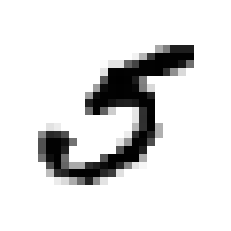

In [58]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)


plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

이미지가 숫자 5처럼 보이는데 target값을 확인해보면 실제로 5인 것을 알 수 있다.  

In [57]:
y[36000]

5

더 많은 이미지를 한번 그려보자(100개).  

In [63]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)                      # 행 1개당 이미지 수 지정
    images = [instance.reshape(size,size) for instance in instances]         # 행 하나하나 for문으로 2차원 배열 만들기
    n_rows = (len(instances) - 1) // images_per_row + 1                      # 행의 수 지정
    row_images = [] 
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

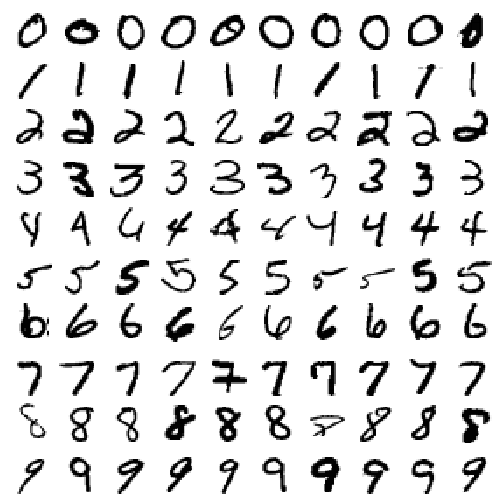

In [64]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

이제 train, test셋을 만들고 작업을 시작해보자!  

In [91]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

train데이터는 섞어서 훈련 샘플의 순서에 영향이 없더록 해주자.  

In [117]:
np.random.seed(7)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 2. 이진분류기(Binary classifier) 훈련  

문제를 단순화 해서 5를 식별하는 분류기(5면 O, 아니면 X)를 만들어 보자.  

In [122]:
# boolean으로, 5면 True 아니면 False
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

사이킷런의 `SCDClassifier`클래스를 사용한 확률적 경사 하강법(SGD, Stochastic Gradient Descent) 분류기를 만들어보자.  

전체 훈련데이터를 이용해 종속변수(True or False)를 예측하도록 훈련시켜보자.  

In [124]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

분류기가 제대로 5를 분류하는데 실패했다.  

In [129]:
sgd_clf.predict([some_digit])  # 아까 샘플로 확인했던 숫자 5

array([False])

## 3. 성능측정  

### 3-1. 교차 검증을 사용한 정확도 측정  

사이킷런에서 제공하는 `cross_val_score()`함수와 같은 기능을 하는 교차 검증 코드를 먼저 구현해보자.  

In [154]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)     # 계층적 샘플링을 해주는 변환기 생성

for train_index, test_index in skfolds.split(X_train, y_train_5):   # 3겹이므로, 3쌍(train, test)의 인덱스를 반환
    clone_clf = clone(sgd_clf)          # 앞서 만든 모델 clone
    X_train_folds = X_train[train_index]      # x_train데이터 인덱싱
    y_train_folds = (y_train_5[train_index])  # y_train데이터 인덱싱
    X_test_fold = X_train[test_index]         # x_test데이터 인덱싱
    y_test_fold = (y_train_5[test_index])     # y_test데이터 인덱싱

    clone_clf.fit(X_train_folds, y_train_folds)  # 모델 학습
    y_pred = clone_clf.predict(X_test_fold)      # 모델 적합값(True or False)
    n_correct = sum(y_pred == y_test_fold)       # 실제값과 비교
    print(n_correct / len(y_pred))               # 전체 값 대비 분류된 값

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9276


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9511
0.9678


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


여기서 헷갈리지 말아야 할 점은(난 헷갈린다..), k-fold교차 검증을 시행할때의 test 데이터는 처음에 분할했던 테스트 데이터가 아니다.  
그러니까 총 70000개의 데이터를 훈련데이터 60000개, 테스트데이터 10000개로 나누었고.  
이 훈련데이터(60000개)를 다시 3등분(20000개 씩)해서 훈련데이터40000개, 테스트데이터 20000개로 교차검증을 실시하는 것이다.  

이번에는 사이킷런에서 제공하는 `cross_val_score()`함수를 이용해보자.  

In [156]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9276, 0.9511, 0.9678])

정확도가 굉장히 높게 나왔다.  
그럼 이번에는 모든 이미지를 5가 아니라고 해버리는 더미 분류기를 만들어 비교해보자.  

In [157]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

여기서 `dtype=bool`옵션은 0이면 False, 1이면 True를 반환해주는데, `np.zeros()`함수는 모든 숫자를 0으로 채워주므로 모두 False가 삽입된다.  
즉, 모두 5가 아님(False)을 나타내는 분류기인 것이다.  

In [186]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv =3, scoring = "accuracy")

array([0.9085 , 0.9095 , 0.91095])

실제로 5가 모두 아니라고만 예측해도, 정확도가 90%이상이 나온다.  
이는 불균형 데이터 셋(비율이 적절하게 분포하지 않음)의 경우 왜곡된 결과를 초래할 수 있다.  

In [212]:
never_5_clf = Never5Classifier()
never_5_clf.fit(X_train, y_train_5)
n_correct = sum(never_5_clf.predict(X_train) == y_train_5.reshape(-1,1))
print(n_correct / len(y_train_5))

[0.90965]


In [215]:
(y_train_5==False).sum() / len(y_train_5)

0.90965

이건 그냥 해본 것..  

5가 아닌것 자체가 90.965%이다.  

### 3-2. 오차 행렬(Confusion Matrix)    